#### Bayesian data analysis

In [2]:
import pandas as pd
import numpy as np

#### Definição do Problema

Suponhamos que estamos experimentando uma estratégia de marketing. E gostaria de prever se os clientes se registrarão para receber nosso produto depois de mostrarmos o produto a ela. Então saímos e fizemos uma amostra de alguns clientes (digamos, 16 deles) e recuperamos a taxa de registro (digamos, 6 deles registrados). Então, com essa taxa de registro, como podemos inferir a probabilidade de registro?

In [3]:
n_sample = 16
n_registered = 6

#### Anteriormente

Sem qualquer conhecimento, assumimos que nosso parâmetro estimado (por exemplo, ρ para uma distribuição de Bernoulli, para taxa de sucesso) é distribuído de 0,0 a 1,0 uniformemente. Portanto, sorteamos aleatoriamente 10.000 valores para μ da distribuição uniforme.

<Axes: >

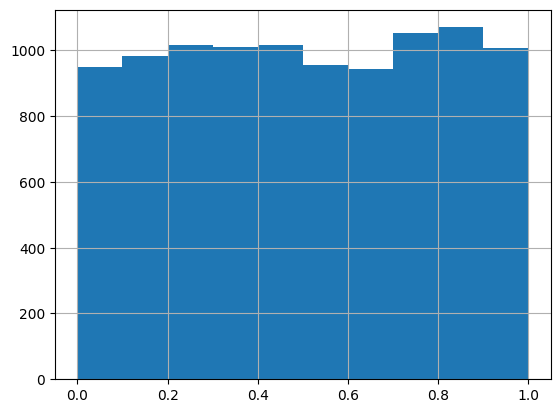

In [4]:
n_draws = 10000
# samples randomly for the prior
prior = pd.Series(np.random.uniform(0.0, 1.0, n_draws))
# draw the distributions of the prior
prior.hist()

#### Modelo Generativo

O modelo generativo é usado para gerar resultados com base em um prior selecionado. Estamos analisando se um cliente se cadastra em nosso produto após uma propaganda ou não. Portanto, nosso modo generativo segue a distribuição de Bernoulli.

In [5]:
def generative_model(parameters):
    return np.random.binomial(n_sample, parameters)

In [6]:
# Test
print(generative_model(0.1))
print(generative_model(0.9))

4
15


#### Simular dados baseados nos dados anteriores (aleatórios gerados) com o modelo generativo

Simulamos os dados usando o modelo anterior e o generativo. Especificamente, para cada valor anterior (para ρ
 ) geramos o número de registros que podem ser gerados com base no anterior selecionado e no modelo generativo

In [7]:
sim_data = list()
for p in prior:
    sim_data.append(generative_model(p))

#### Posterior

Filtre todos os sorteios que não correspondem aos dados. Ou seja, mantemos apenas as amostras que de 16 clientes, 6 foram cadastrados (ou o modelo generativo gera 6). Então observe a distribuição de ρ
  dado este fato (dados). O posterior dará o ρ
  que fornece os resultados exatamente como o nosso resultado (fatos). Assim, podemos voltar e verificar o nosso anterior (filtre-o) e obter o posterior

In [8]:
posterior = prior[[x == n_registered for x in sim_data]]

In [9]:
posterior

18      0.234701
28      0.210218
37      0.435543
91      0.334841
109     0.429042
          ...   
9940    0.348441
9952    0.308149
9953    0.276758
9958    0.411910
9961    0.517282
Length: 604, dtype: float64

<Axes: >

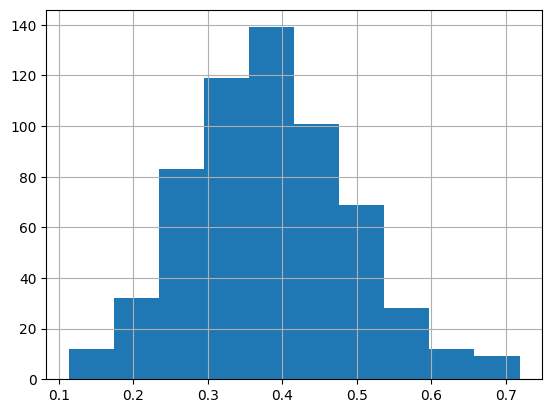

In [10]:
# show the distribution of the posterior
posterior.hist()

In [11]:
print(f"Number of draws left: {len(posterior)}")

Number of draws left: 604


In [12]:
print(f"Posterior median: {'%.3f'%posterior.median()}")

Posterior median: 0.379


In [13]:
print(f"Posterior interval: {'%.3f'%posterior.quantile(0.25)}, {'%.3f'%posterior.quantile(0.75)}")

Posterior interval: 0.305, 0.450


In [14]:
# how is the result comparing to 20%, meaning the percentages of posteriors that we can have the registration rate as 20%
sum(posterior >0.2)/len(posterior)

0.9619205298013245

In [15]:
registrations = pd.Series([np.random.binomial(n=100, p=p) for p in posterior])

<Axes: >

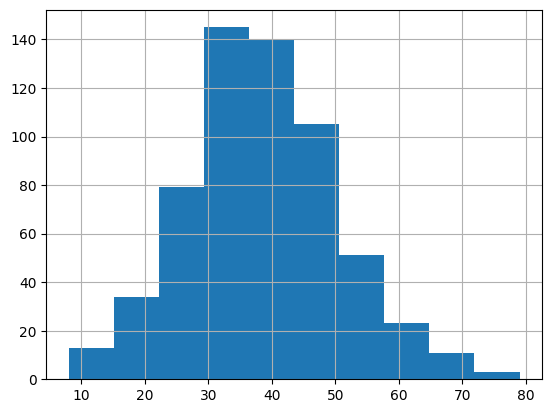

In [16]:
registrations.hist()

In [17]:
print('Registration 95%% quantile interval %d-%d'%tuple(registrations.quantile([0.025, 0.975]).values))

Registration 95% quantile interval 16-64
